In [1]:
##libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt

<AxesSubplot:>

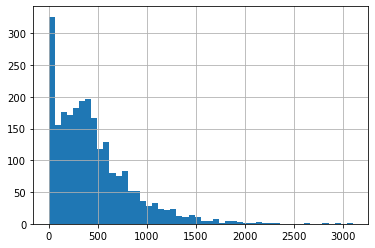

In [2]:
##read data - biomass, Virginia LTER
##Mac:
# df = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Virginia_ChristianBlum.csv', skiprows=21)
# df_wq = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Virginia_WQ.csv', skiprows=21)

##PC:
df = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Virginia_ChristianBlum.csv', skiprows=21)
df_wq = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Virginia_WQ.csv', skiprows=21, \
                    encoding='cp1252') ##Have no idea what's with this encoding argument but it works

##Begin:
df = df[df['speciesName'] == 'Spartina alterniflora'] ##only low marsh and creekbank???

df = df[['EOYBYear', 'collectDate', 'marshName', 'siteName', 'locationID', 'monitoringPurpose', \
         'Transect', 'Replicate', 'speciesName', 'liveMass', 'deadMass', 'totalMass', 'latitude', 'longitude']]

df['collectDate'] = pd.to_datetime(df['collectDate'])

df['liveMass'] = 16 * df['liveMass'] ##look at histograms; is averaging the best way?
df['deadMass'] = 16 * df['deadMass']
df['totalMass'] = 16 * df['totalMass']

locations = [1, 2] ## 1 = creekbank; 2 = low marsh
#df = df[df['locationID'].isin(locations)] ##MOSTLY Spartina alterniflora-only plots; in other zones plots were mixed

df_wq['measureDate'] = pd.to_datetime(df_wq['measureDate'])

max(df['liveMass'])

#df['liveMass'].hist(by=df['siteName'])
df['liveMass'].hist(bins = 50)

##IMPORTANT NOTE: 2017 data does not distinguish live from dead biomass due to a freezer failure

In [6]:
##summary statistics
df_means = df.groupby('EOYBYear', as_index = False).mean()
df_sem = df.groupby('EOYBYear').sem()

df_means['Year'] = df_means['EOYBYear']
#df.groupby('EOYBYear').aggregate([np.mean, np.size])
#df_means ##'average lat/long' useless
#df_sem

In [7]:
##grouped by site and by year
mn_siteyears = df.groupby(['siteName', 'EOYBYear'], as_index = False).aggregate([np.mean, np.size, np.std]).reset_index()
se_siteyears = df.groupby(['siteName', 'EOYBYear'], as_index = False).sem()

newdf = df.groupby(['siteName', 'EOYBYear'], as_index = False).mean()

##rearrange lat and long for GEE
mn_siteyears = mn_siteyears[['siteName', 'EOYBYear', 'locationID', 'liveMass', 'longitude', \
                             'latitude', 'deadMass', 'totalMass']]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
    #print(mn_siteyears)

#print(se_siteyears)

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'outx2.csv')
#se_siteyears.to_csv(out_csv, index=False) ##set out directory

newdf['year'] = newdf['EOYBYear']
print(df)

      EOYBYear collectDate         marshName  siteName  locationID  \
12        1999         NaT           Bellvue   Bellvue           4   
13        1999         NaT           Bellvue   Bellvue           2   
14        1999         NaT           Bellvue   Bellvue           2   
15        1999         NaT           Bellvue   Bellvue           1   
16        1999         NaT           Bellvue   Bellvue           1   
...        ...         ...               ...       ...         ...   
8203      2017  2017-08-14            Oyster    Oyster           3   
8204      2017  2017-08-14            Oyster    Oyster           3   
8232      2017  2017-08-04       Gator Tract     Gator           3   
8234      2018  2017-08-14          Box Tree  Box_Tree           1   
8236      2018  2017-08-14  Hog Island North       Hog           3   

     monitoringPurpose Transect Replicate            speciesName  liveMass  \
12                EOYB        D         b  Spartina alterniflora    454.40   
13 

In [8]:
##some figures
#df.boxplot(column='liveMass', by='EOYBYear')
#mn_siteyears.boxplot(column='liveMass', by='siteName') ##using averages as individual points

In [9]:
# #my_path = os.path.abspath('/Users/asariversjulien/Documents/Georgia/Project')
# #my_file = 'p1.png'
# #g.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')

print("hi")

hi
